<a href="https://colab.research.google.com/github/Madrinmarison/Deep_Learning/blob/main/Predicting_Insurance_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression with Neural networks

### Create a custom dataset and create a neural network on.

In [ ]:
# Import dependecies
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Create features
X = np.linspace(-100,100, 1000)
# create labels
y = X + 100

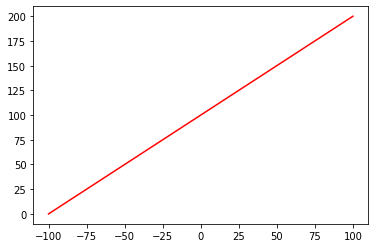

In [ ]:
# plt.figure(figsize=(7,7))
plt.plot(X,y, c="r");

In [ ]:
# Input and output shape
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

Observation: Data has no shape

In [ ]:
# Turn data into tensors of float32
x = tf.constant(X, dtype=tf.float32)
y = tf.constant(y, dtype=tf.float32)
x[0],y[0]

(<tf.Tensor: shape=(), dtype=float32, numpy=-100.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.0>)

###  Split data into a training and test set

In [ ]:
len(x), len(y)

(1000, 1000)

In [ ]:
# train_test sets split
x_train, x_test = x[:800], x[800:]
y_train, y_test = y[:800], y[800:]

### Built a model and fit on the training dataset

In [ ]:
# Ensure Features are in atleast in 2D
x_train.shape, x_test.shape

(TensorShape([800]), TensorShape([200]))

In [ ]:
# expand features dimension
x_train = tf.expand_dims(x_train, axis = 1)
x_test = tf.expand_dims(x_test, axis = 1)
x_train.shape, x_test.shape

(TensorShape([800, 1]), TensorShape([200, 1]))

In [ ]:

# set random seed
tf.random.set_seed(42)

# create the model
demo_model = tf.keras.Sequential([
    layers.Dense(10, activation = "relu"),
    layers.Dense(100, activation = "relu"),
    layers.Dense(100, activation = "relu"),
    layers.Dense(100, activation = "relu"),
    layers.Dense(10),
    layers.Dense(1)
])

# Compile the model
demo_model.compile(loss = "mae",
                   optimizer = tf.keras.optimizers.Adam(lr = 0.01),
                   metrics = ["mae"])
# Fit the model
demo_model_history = demo_model.fit(x_train,
                                    y_train,
                                    epochs = 100,
                                    verbose = 0)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# Evaluate the model
demo_model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.2399 - mae: 0.2399


[0.23988327383995056, 0.23988327383995056]

In [ ]:
# model summary
demo_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                20        
                                                                 
 dense_8 (Dense)             (None, 100)               1100      
                                                                 
 dense_9 (Dense)             (None, 100)               10100     
                                                                 
 dense_10 (Dense)            (None, 100)               10100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
 dense_12 (Dense)            (None, 1)                 11        
                                                                 
Total params: 22,341
Trainable params: 22,341
Non-trai

Text(0.5, 0, 'loss')

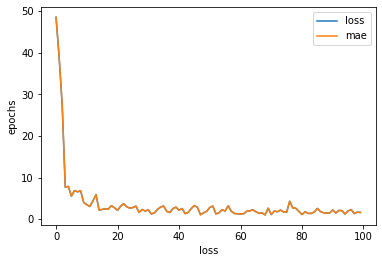

In [ ]:

# Plot model history
pd.DataFrame(demo_model_history.history).plot()
plt.ylabel("epochs")
plt.xlabel("loss")

In [ ]:

# Evaluate the model
demo_model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.2399 - mae: 0.2399


[0.23988327383995056, 0.23988327383995056]

### Make and plot predictions


In [ ]:
# Create a plotting function
def plot_predictions(x_train = x_train,
                     x_test = x_test,
                     y_train = y_train,
                     y_test = y_test,
                     predictions = 0):
    plt.figure(figsize=(10,7))
    plt.plot(x_train, y_train, color = "r", label = "Train_data")
    plt.plot(x_test, y_test, color = "b", label = "Test_data")
    plt.plot(x_test, predictions, color = "g", label = "Model_Predictions")
    plt.legend();

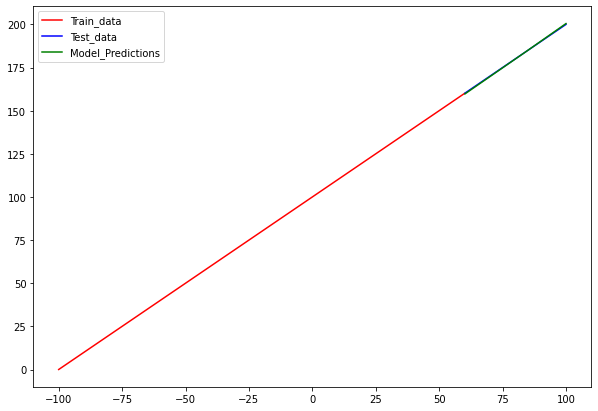

In [ ]:
# Make and plot predictions
model_preds = demo_model.predict(x_test)
plot_predictions(predictions=model_preds)

Model is capturing linear relationship

In [ ]:
# Save the model
linear_model = demo_model.save("demo_model")
# load the and evaluate the save model
loaded_model_eval = tf.keras.models.load_model("demo_model").evaluate(x_test,y_test)
loaded_model_eval

7/7 [==============================] - 0s 2ms/step - loss: 0.2399 - mae: 0.2399


[0.23988327383995056, 0.23988327383995056]

The model was saved and loaded successfully

## Project I

### Predicting Insurance health cover price

In [ ]:
# Import dependencies
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras import layers as tfkl
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Import data set
insurance_data = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Data description
**Columns**

**age:** age of primary beneficiary

**sex:** insurance contractor gender, female, male

**bmi:** Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m^2) using the ratio of height to weight, ideally 18.5 to 24.9

**children:** Number of children covered by health insurance / Number of dependents

**smoker:** Smoking (smoker or non-smoker)

**region:** the beneficiary's residential area (US, northeast, southeast, southwest, northwest).

**charges:** Individual medical costs charged vy the insurance based on the above features.


# Objective:
Develop a Regression Neural Network to learn the relationship between features  and the study variable of the dataset such that the resultant model can be used to predict the insurance charges of the future clients based on their risk exposure.

**Dataset Features:** age, sex, bmi, children, smoker, and region

**Dataset Study Variable:** charges

We can't just take the data and pass it directly to the neural network model to learn on.

First we need to understand our data very well on fields such as data-types of various features and if any transformation is needed we carry out.

 As we know, machine learning models works with numerical data. With this said, our first step will be cleaning our dataset.

In [ ]:
# Get a brief info about the dataset
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**Notice:**
* No missing values in the dataset
* Sex, smoker, region, are all object data types.
* Age and children are int64 data-type
* bmi and charges are float64 data-type

In [ ]:
# proof check if the dataset has null values
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
insurance_data.isnull().values.any()

False

In [ ]:
# Create features and labels
X = insurance_data.drop("charges", axis = 1)
y = insurance_data["charges"]
len(X), len(y)

(1338, 1338)

In [ ]:
# Split data into a train-test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1070, 6), (268, 6), (1070,), (268,))

In [ ]:
# print the head of the training features
x_train.head()

,age,sex,bmi,children,smoker,region
560,46,female,19.95,2,no,northwest
1285,47,female,24.32,0,no,northeast
1142,52,female,24.86,0,no,southeast
969,39,female,34.32,5,no,southeast
486,54,female,21.47,3,no,northwest


### Transform data
Transform data after train-test splits. This prevents information leak from our pseudo future data (test) to the training data. This can lead into a into a higly biased model which performs pretty well on bioth the training and test data but very poorly in the real world data.

Laverage `sklearn` classes for data transformation.

In [ ]:
# Columns to encode: sex, smoker and region
# Columns to normalize: age, bmi, and children
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown = "ignore"), ["sex", "smoker", "region"])
)

# Fit the column transformer to the training data
ct.fit(x_train)

# Transform training and test data with normalization (MinMaxScaler) and encoding (OneHotEncoder)
train_normalized = ct.transform(x_train) # comes out as a numpy array
test_normalized = ct.transform(x_test)

In [ ]:
x_train.iloc[0] # dataframe

age                46
sex            female
bmi             19.95
children            2
smoker             no
region      northwest
Name: 560, dtype: object

In [ ]:
train_normalized[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
train_normalized.shape

(1070, 11)

## Run Modelling Experimentation

### Build a neural network

### Model 1:
- 1 Dense layer
- Default learning rate
- Train for 100 epochs
- Use Adam optimizer

In [ ]:
# Set seed
tf.random.set_seed(42)

# Create model
insurance_model_1 = Sequential([
    tfkl.Dense(1)
])

# Compile the model
insurance_model_1.compile(loss = "mae",
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["mae"])

# Fit the model
model_1_history = insurance_model_1.fit(train_normalized,
                          y_train,
                          epochs = 100,
                          verbose = 0)

In [ ]:
# Evaluate the model
insurance_model_1.evaluate(test_normalized, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 12951.5898 - mae: 12951.5898


[12951.58984375, 12951.58984375]

### Model 2:
- Increase the number of hidden units

### Add complexity to the model
- Increase the number of hidden layers.

In [ ]:

# Set seed
tf.random.set_seed(42)

# Create model
insurance_model_2 = Sequential([
    tfkl.Dense(10, activation="relu"),
    tfkl.Dense(100, activation="relu"),
    tfkl.Dense(1)
])

# Compile the model
insurance_model_2.compile(loss = "mae",
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["mae"])

# Fit the model
model_2_history = insurance_model_2.fit(train_normalized,
                          y_train,
                          epochs = 100,
                          verbose = 0)

In [ ]:
# Evaluate the model
insurance_model_2.evaluate(test_normalized, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3473.1638 - mae: 3473.1638


[3473.163818359375, 3473.163818359375]

### Model 3:
Add more units on the first layer and adjust the learning rate

In [ ]:
# Set seed
tf.random.set_seed(42)

# Create model
insurance_model_3 = Sequential([
    tfkl.Dense(100, activation="relu"),
    tfkl.Dense(100, activation="relu"),
    tfkl.Dense(1)
])

# Compile the model
insurance_model_3.compile(loss = "mae",
              optimizer = tf.keras.optimizers.Adam(lr = 0.01),
              metrics = ["mae"])

# Fit the model
model_3_history = insurance_model_3.fit(train_normalized,
                          y_train,
                          epochs = 100,
                          verbose = 0)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# Evaluate the model
insurance_model_3.evaluate(test_normalized, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 1755.7856 - mae: 1755.7856


[1755.78564453125, 1755.78564453125]

Text(0.5, 0, 'epochs')

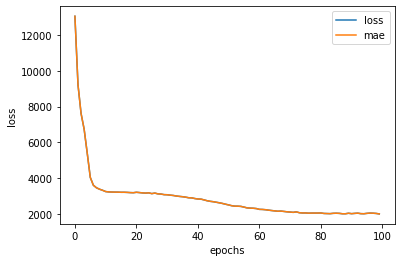

In [ ]:
# plot model 3 history
pd.DataFrame(model_3_history.history).plot()
plt.ylabel("loss")
plt.xlabel('epochs')

In [ ]:
# Make predition with model 3
model_3_preds = insurance_model_3.predict(test_normalized)
model_3_preds[:5]

array([[ 9029.755],
       [ 5275.985],
       [29934.395],
       [ 9200.13 ],
       [25799.795]], dtype=float32)

In [ ]:
# Save model 3
insurance_model_3.save("model_3")

In [ ]:
# load saved model
model_3_loaded = tf.keras.models.load_model("model_3")
model_3_loaded.evaluate(test_normalized, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 1755.7856 - mae: 1755.7856


[1755.78564453125, 1755.78564453125]

In [ ]:
# Compaire the loaded model with original one
model_3_loaded.evaluate(test_normalized, y_test) == insurance_model_3.evaluate(test_normalized, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 1755.7856 - mae: 1755.7856


True

The model was saved and loaded successfully

## Project II

This notebook presents the model that attained higher score after running a couple of modelling experiments. That said, this part of notebook we are not going to run modelling experiment.

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


### Understanding the data

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((404, 13), (404,), (102, 13), (102,))

In [ ]:
x_train[0].shape, y_train[0].shape

((13,), ())

### **Observation:**
- There 404 training examples.
- Each examples has 13 features

- There 102 test data
- The target variable is a constant and thus has no shpe

Tensorflow datasets is ussually prepared ready to build a model

In [ ]:
# Print the data head
x_train[:5]

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, 0.00000e+00, 5.38000e-01,
        6.14200e+00, 9.17000e+01, 3.97690e+00, 4.00000e+00, 3.07000e+02,
        2.10000e+01, 3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, 0.00000e+00, 4.15000e-01,
        7.61000e+00, 1.57000e+01, 6.27000e+00, 2.00000e+00, 3.48000e+02,
        1.47000e+01, 3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 6.31000e-01,
        4.97000e+00, 1.00000e+02, 1.33250e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 3.75520e+02, 3.26000e+00],
       [3.96100e-02, 0.00000e+00, 5.19000e+00, 0.00000e+00, 5.15000e-01,
        6.03700e+00, 3.45000e+01, 5.98530e+00, 5.00000e+00, 2.24000e+02,
        2.02000e+01, 3.96900e+02, 8.01000e+00],
       [3.69311e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 7.13000e-01,
        6.37600e+00, 8.84000e+01, 2.56710e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 3.91430e+02, 1.46500e+01]])

### Create a model to predict the house price based on the house features

In [ ]:
# set random seed
tf.random.set_seed(1)

# Create model
boston_pricing_model = Sequential([
    tfkl.Dense(100, activation="relu"),
    tfkl.Dense(100, activation="relu"),
    tfkl.Dense(1)
])

# Compile the model
boston_pricing_model.compile(loss = "mae",
                             optimizer = tf.keras.optimizers.Adam(lr = 0.01),
                             metrics = ["mae"])

# Fit the model
history = boston_pricing_model.fit(x_train,
                                   y_train,
                                   epochs = 500,
                                   verbose = 0)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# Evaluate the model
boston_pricing_model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 2.7848 - mae: 2.7848


[2.7848284244537354, 2.7848284244537354]

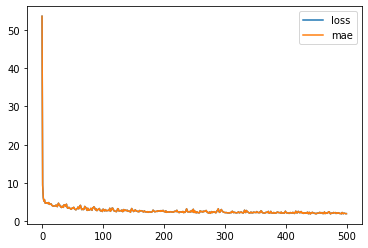

In [ ]:
# Plot history
pd.DataFrame(history.history).plot()

In [ ]:
# Make and plot predictions
boston_pricing_preds = boston_pricing_model.predict(x_test)
np.round(boston_pricing_preds[:10])

array([[10.],
       [19.],
       [20.],
       [32.],
       [23.],
       [21.],
       [29.],
       [22.],
       [19.],
       [21.]], dtype=float32)

In [ ]:
np.round(y_test[:10])

array([ 7., 19., 19., 27., 22., 24., 31., 23., 20., 23.])

In [ ]:
# Save the model
boston_pricing_model.save("boston_house_pricing")
# load and evaluate the model
boston_loaded_model = tf.keras.models.load_model("boston_house_pricing")
boston_loaded_model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 2.7848 - mae: 2.7848


[2.7848284244537354, 2.7848284244537354]

The model was saved and loaded successfully.